In [2]:
!pip install mysql.connector

     |████████████████████████████████| 11.9MB 2.4MB/s eta 0:00:01   |▏                               | 51kB 1.6MB/s eta 0:00:08
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-macosx_10_7_x86_64.whl size=247955 sha256=e706ec1d999d21d5625de034a94665c8e949a5ea160f428e29117b5979c6bbe7
  Stored in directory: /Users/sharvarinagesh/Library/Caches/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql.connector


# 1. Reading and Exploring Data

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [254]:
import mysql.connector

mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone2"
)

tables = ['department_data', 'employee_details_data', 'employee_data']

#mycursor = mydb.cursor()
mycursor = mydb.cursor(buffered=True , dictionary=True)
mycursor.execute("SELECT * FROM department_data")
department_data = pd.DataFrame(mycursor.fetchall())

mycursor.execute("SELECT * FROM employee_data")
employee_data = pd.DataFrame(mycursor.fetchall())

mycursor.execute("SELECT * FROM employee_details_data")
employee_details_data = pd.DataFrame(mycursor.fetchall())



#for x in department_data:
print(len(department_data))
print(len(employee_data))
print(len(employee_details_data))


11
14150
14245


### Exploring department_data

In [204]:
department_data.head(15)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [170]:
department_data.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-TP,Support,Henry Adey
freq,1,1,1


In [38]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
dept_id      11 non-null object
dept_name    11 non-null object
dept_head    11 non-null object
dtypes: object(3)
memory usage: 392.0+ bytes


### Exploring employee_data

In [255]:
employee_data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707
5,135.00,D00-MT,None,0.482184,2,NaN,low,0.381545,Left,3.00,121685
6,270.00,D00-PD,None,0.867087,6,NaN,low,0.172575,Left,4.00,119912
7,244.00,D00-IT,None,0.926197,6,NaN,medium,0.061868,Left,5.00,112868
8,289.00,D00-IT,None,0.929858,7,NaN,low,0.161744,Left,4.00,122314
9,281.00,D00-SS,None,0.907965,6,NaN,medium,0.105749,Left,4.00,122394


In [256]:
employee_data.describe()

,last_evaluation,n_projects,recently_promoted,satisfaction,employee_id
count,12663.000000,14150.000000,297.0,14000.000000,14150.000000
mean,0.718399,3.778304,1.0,0.621212,112080.750247
std,0.173108,1.250162,0.0,0.250482,8748.202856
min,0.316175,1.000000,1.0,0.040058,0.000000
25%,0.563711,3.000000,1.0,0.450356,105772.500000
50%,0.724731,4.000000,1.0,0.652394,111291.500000
75%,0.871409,5.000000,1.0,0.824925,116650.750000
max,1.000000,7.000000,1.0,1.000000,148988.000000


In [257]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
avg_monthly_hrs      14150 non-null object
department           13443 non-null object
filed_complaint      2046 non-null object
last_evaluation      12663 non-null float64
n_projects           14150 non-null int64
recently_promoted    297 non-null float64
salary               14150 non-null object
satisfaction         14000 non-null float64
status               14150 non-null object
tenure               14000 non-null object
employee_id          14150 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


**Note** : employee_data table has missing data in the below columns:<br>
a. tenure (150 records) <br>
b. satisfaction(150 records) <br>
c. last_evaluation(1487 records) <br>
d. department(707 records) <br>
e. filed_commplaint(12104) <br>
f. recently_promoted(13853)<br>

Missing data has to be handled.

In [206]:
employee_data.employee_id.nunique()

14117

**Note**: employee_data has only 14117 unique employee ids our of 14150 records. Looks like there are 33 duplicate records

In [41]:
employee_data.employee_id.duplicated().sum()

33

In [207]:
employee_data[employee_data.employee_id.duplicated(keep=False)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,None,0.852702,6,NaN,low,0.069168,Left,4.00,0
304,264.00,D00-ENG,None,0.774554,6,NaN,low,0.110974,Left,4.00,0
374,307.00,D00-IT,None,0.905708,7,NaN,low,0.125275,Left,4.00,111323
1234,129.00,D00-SP,None,0.402660,2,NaN,medium,0.437359,Left,3.00,0
1438,282.00,D00-SS,None,0.875427,6,NaN,low,0.065908,Left,4.00,116247
...,...,...,...,...,...,...,...,...,...,...,...
14145,245.00,D00-SS,None,0.850785,6,NaN,medium,0.225084,Employed,5.00,101809
14146,192.00,D00-SS,None,0.951901,3,NaN,medium,0.539834,Employed,3.00,116153
14147,175.00,D00-MN,None,0.854538,4,NaN,medium,0.934465,Employed,3.00,119780
14148,268.00,D00-MT,None,0.900887,5,NaN,medium,0.906613,Left,5.00,115325


**Note** : There are 33 repeated employee ids. Also, we noted that there are 4 employee_ids with value 0. Duplicate records needs to be dropped and employee_ids with value 0 has to be deleted.

In [23]:
employee_data.nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12188
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13497
status                   2
tenure                   8
employee_id          14117
dtype: int64

In [208]:
employee_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

**Note**: There are 12 departments in employee_data where as in department_data there are only 11 departments. emplyee_data has an additional department: '-IT'. Looks like this is an error while entering the data. The department should have been 'D00-IT'

In [7]:
employee_data[employee_data['employee_id'] == 0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,None,0.852702,6,NaN,low,0.069168,Left,4.00,0
304,264.00,D00-ENG,None,0.774554,6,NaN,low,0.110974,Left,4.00,0
1234,129.00,D00-SP,None,0.402660,2,NaN,medium,0.437359,Left,3.00,0
11304,167.00,None,None,0.880053,5,NaN,low,0.682140,Employed,3.00,0
12304,259.00,D00-ENG,None,0.505883,5,NaN,low,0.631046,Employed,4.00,0


In [4]:
employee_data.status.value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

#### Exploring employee_details_data

In [8]:
employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [9]:
employee_details_data.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [7]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
employee_id       14245 non-null int64
age               14245 non-null int64
gender            14245 non-null object
marital_status    14245 non-null object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [53]:
employee_details_data.employee_id.nunique()

14245

**Note**: There are 14245 unique employee_ids in employee_details_data. Where as in employee_data, there are only 14117 unique records. Employee_data has 128 employee_ids missing. 

In [11]:
employee_details_data[employee_details_data['employee_id'] == 0]

,employee_id,age,gender,marital_status


# 	2. Fix Structural Errors

### Dropping duplicate columns:

In [258]:
employee_data = employee_data.drop_duplicates()

### Dropping employee_id=0 columns:

In [259]:
employee_data[employee_data['employee_id'] == 0].index

Int64Index([34, 304, 1234, 11304, 12304], dtype='int64')

In [261]:
employee_data = employee_data.drop(employee_data[employee_data['employee_id'] == 0].index)
#data.drop(["EventID"], axis = 1, inplace = True)

In [212]:
employee_data.count()

avg_monthly_hrs      14116
department           13410
filed_complaint       2041
last_evaluation      12629
n_projects           14116
recently_promoted      297
salary               14116
satisfaction         13966
status               14116
tenure               13966
employee_id          14116
dtype: int64

In [106]:
employee_data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,D00-SS,0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467
1,134.0,D00-SS,0,0.555718,2,0.0,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1,0.474082,2,0.0,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,0,0.961360,6,0.0,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707
5,135.0,D00-MT,0,0.482184,2,0.0,low,0.381545,Left,3.0,121685
6,270.0,D00-PD,0,0.867087,6,0.0,low,0.172575,Left,4.0,119912
7,244.0,D00-IT,0,0.926197,6,0.0,medium,0.061868,Left,5.0,112868
8,289.0,D00-IT,0,0.929858,7,0.0,low,0.161744,Left,4.0,122314
9,281.0,D00-SS,0,0.907965,6,0.0,medium,0.105749,Left,4.0,122394


In [262]:
employee_data['filed_complaint'] = employee_data['filed_complaint'].fillna(0)
employee_data['recently_promoted'] = employee_data['recently_promoted'].fillna(0)
employee_data['last_evaluation'] = employee_data['last_evaluation'].fillna(0.0)
employee_data['satisfaction'] = employee_data['satisfaction'].fillna(0.0)
employee_data['tenure'] = employee_data['tenure'].fillna(0.0)

### Replace wrong department value '-IT' with 'D00-IT'

In [263]:

#employee_data['department'] = employee_data.apply(lambda x: 'D00-IT' if(employee_data['department'] == '-IT' or )  else employee_data['department'], axis =1)

employee_data['department'] = employee_data['department'].replace({'-IT': 'D00-IT'})


In [98]:
employee_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

#### Replacing missing department with mode value

In [264]:
employee_data['department'] = employee_data['department'].fillna(employee_data['department'].mode()[0])

In [181]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 11 columns):
avg_monthly_hrs      14116 non-null object
department           14116 non-null object
filed_complaint      14116 non-null object
last_evaluation      14116 non-null float64
n_projects           14116 non-null int64
recently_promoted    14116 non-null float64
salary               14116 non-null object
satisfaction         14116 non-null float64
status               14116 non-null object
tenure               14116 non-null object
employee_id          14116 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.3+ MB


**Note**: avg_monthly_hrs, filed_complaint, salary,tenure are considered object types where as they have float values iin those fields. So changing the type of the column to float

In [265]:
employee_data['avg_monthly_hrs'] =employee_data['avg_monthly_hrs'].astype('float')
employee_data['filed_complaint'] =employee_data['filed_complaint'].astype('int')
employee_data['tenure'] =employee_data['tenure'].astype('float')

In [183]:
employee_data.filed_complaint.value_counts()

0    12075
1     2041
Name: filed_complaint, dtype: int64

# Merging Data

In [266]:
train_dataset = pd.merge(employee_details_data, employee_data, on='employee_id', how='right') #.merge(department_data, on='department', how='left')

In [104]:
train_dataset.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,0,0.753977,5,1.0,medium,0.921208,Employed,4.0
1,112256,24,Female,Unmarried,201.0,D00-MN,0,0.964453,3,0.0,medium,0.568479,Employed,3.0
2,112586,22,Female,Unmarried,239.0,D00-SS,0,0.756458,3,0.0,low,0.144812,Employed,6.0
3,108071,36,Male,Married,151.0,D00-PR,0,0.608282,5,0.0,medium,0.210300,Employed,6.0
4,116915,38,Male,Married,259.0,D00-IT,0,0.749206,4,0.0,medium,0.888514,Employed,3.0


In [112]:
train_dataset.to_excel("employee_data.xlsx") 

In [23]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14116 entries, 0 to 14115
Data columns (total 14 columns):
employee_id          14116 non-null int64
age                  14116 non-null int64
gender               14116 non-null object
marital_status       14116 non-null object
avg_monthly_hrs      14116 non-null float64
department           14116 non-null object
filed_complaint      14116 non-null int64
last_evaluation      14116 non-null float64
n_projects           14116 non-null int64
recently_promoted    14116 non-null float64
salary               14116 non-null object
satisfaction         14116 non-null float64
status               14116 non-null object
tenure               14116 non-null float64
dtypes: float64(5), int64(4), object(5)
memory usage: 1.5+ MB


In [113]:
train_dataset.describe()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000
mean,112120.657764,32.896005,199.992632,0.144588,0.642653,3.777770,0.021040,0.614719,3.460541
std,8497.639403,9.975000,50.826952,0.351697,0.274645,1.249693,0.143523,0.257143,1.496271
min,100101.000000,22.000000,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,105773.500000,24.000000,155.000000,0.000000,0.522018,3.000000,0.000000,0.442808,3.000000
50%,111293.500000,29.000000,199.000000,0.000000,0.683402,4.000000,0.000000,0.648350,3.000000
75%,116655.250000,41.000000,245.000000,0.000000,0.856854,5.000000,0.000000,0.822960,4.000000
max,148988.000000,57.000000,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000


In [185]:
train_dataset.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'department', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')

In [21]:
train_dataset.marital_status.value_counts()

Unmarried    7211
Married      6905
Name: marital_status, dtype: int64

In [51]:
gg["filed_complaint"].value_counts()

0    12075
1     2041
Name: filed_complaint, dtype: int64

# 3. EDA

#### Distribution of Left and Employed numbers

Text(0.5, 1.0, 'Pie chart showing the proportion of employees who have left the organisation')

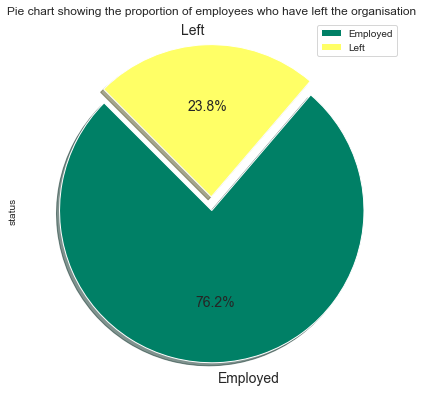

In [186]:
train_dataset['status'].value_counts().plot(kind='pie',  explode = [0, 0.09], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(7,7), shadow=True, startangle=135, legend=True, cmap='summer')
plt.title('Pie chart showing the proportion of employees who have left the organisation')

**Observations** : 23.8% of the employees have left and 76.2% of the employees are still employed with the company

['filed_complaint', 'gender', 'salary', 'recently_promoted', 'marital_status', 'department']


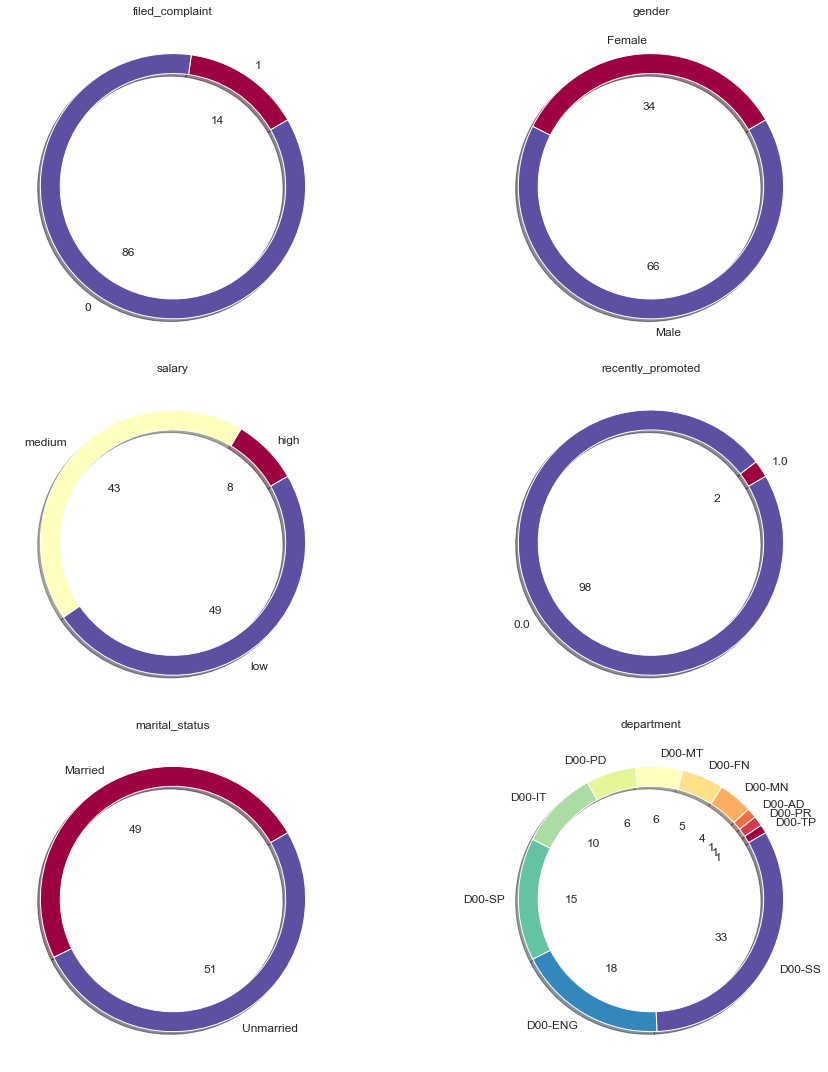

In [188]:
cont = ['satisfaction', 'avg_monthly_hrs', 'n_projects', 'tenure', 'age', 'last_evaluation']
cats = list(set(train_dataset.columns)-set(cont))
cats.remove('employee_id')
cats.remove('status')
print(cats)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train_dataset[cats]):
    _ = train_dataset[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], shadow = True, title=c, autopct='%.0f',cmap = "Spectral", fontsize=12, startangle = 30,wedgeprops=dict(width=0.15))
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()


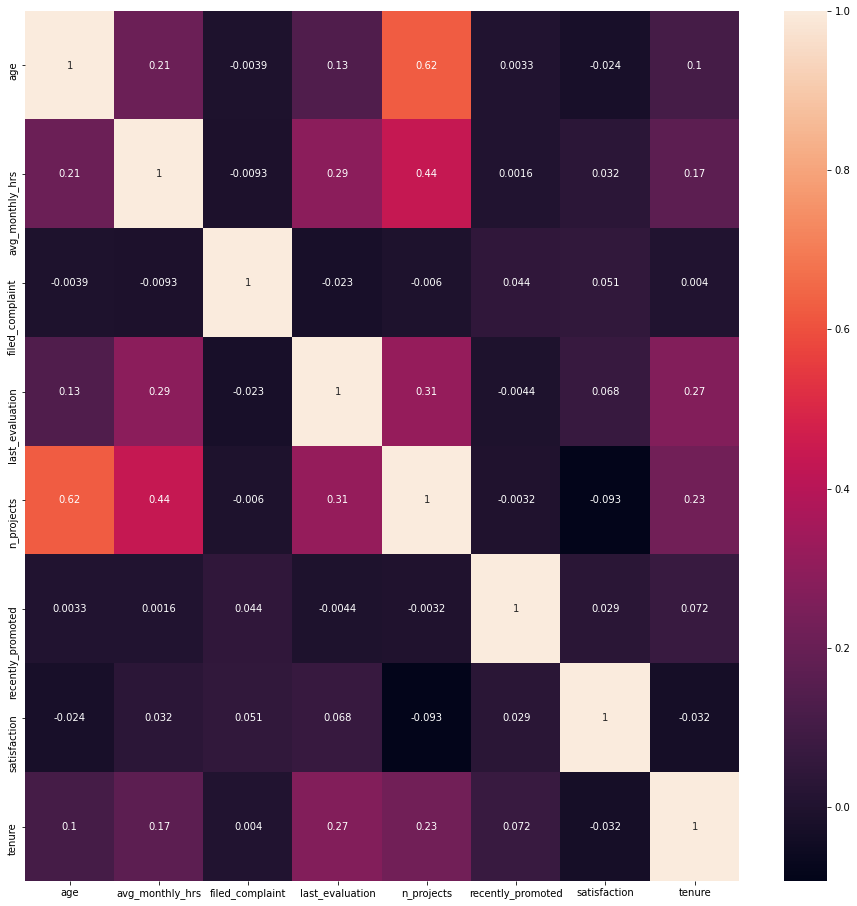

In [71]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap( train_dataset[['age', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation','n_projects','recently_promoted','satisfaction','tenure'] ].corr(), annot=True );

#### How are married people who are working long hours coping in the company

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


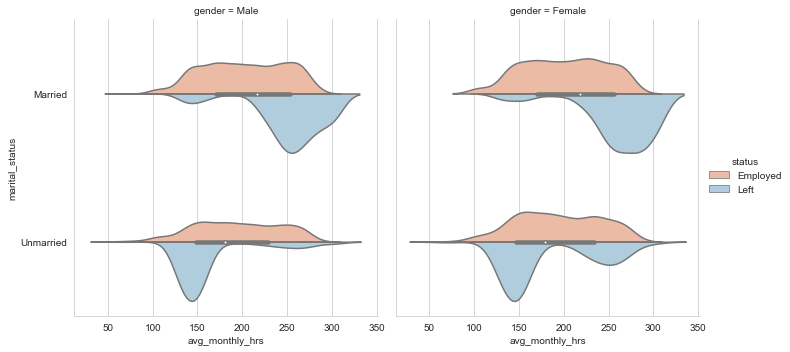

In [267]:
sns.factorplot(y ='marital_status', x= 'avg_monthly_hrs',kind = 'violin', col = 'gender', 
               hue= 'status',data = train_dataset, palette= 'RdBu', split = True)

**Observations**: Interestingly, most of the married people who have left the company have been working longer hours compared to married people who are still employed. Contrary to married people, Unmarried people who have left the company are interestingly working less than unmarried people who have stayed with the company. 

#### Recently promoted vs average monthly working hours

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


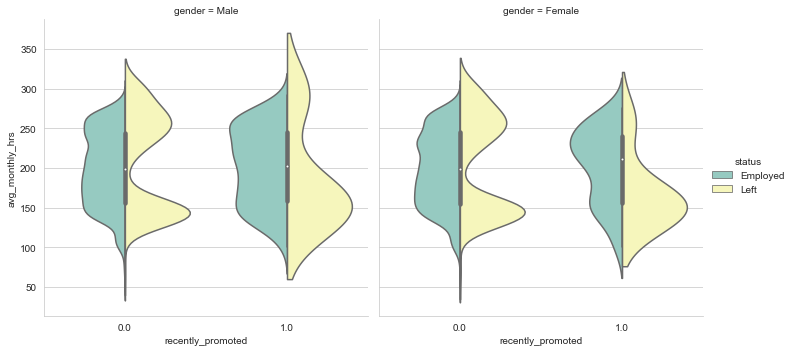

In [189]:
sns.factorplot(x ='recently_promoted', y= 'avg_monthly_hrs',kind = 'violin', col='gender',
               hue= 'status',data = train_dataset, palette='Set3', split = True)

** Observations** : When we see how many hours an employees who is promoted working, we notice that a promoted employee if he has intention to leave, reduces his working hours.

#### How are married and unmarried employees doing in the company

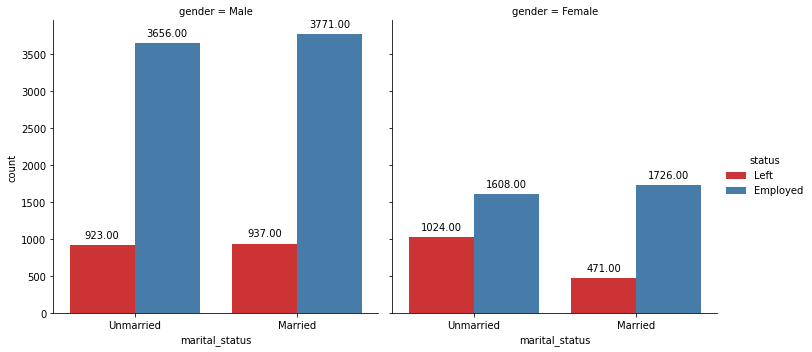

In [88]:
g = sns.catplot(x ='marital_status', 
               hue= 'status',kind = 'count', col = 'gender', data = train_dataset, palette="Set1")
total = len(train_dataset['marital_status'])
for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Observations**: for around 3.7k male employees (either married or not), 900+ employees are quitting. That is around 25% of employees. when we consider Female employees, for 1726 married female employees 471 have left which makes 27%. where as 1024 unmarried female employees our of 1608, ie., 63% of unmarried female employees have left the company. 

# 3. Preprocessing

In [268]:
train_dataset = pd.get_dummies(train_dataset, columns=["gender","marital_status","status","salary","department"], drop_first=True)

#### dropping employee_id column

In [269]:
dropColumns = ['employee_id']
train_dataset = train_dataset.drop(dropColumns,axis=1)

In [220]:
train_dataset.head()

,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,gender_Male,marital_status_Unmarried,...,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP
0,43,111.0,0,0.753977,5,1.0,0.921208,4.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,24,201.0,0,0.964453,3,0.0,0.568479,3.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,22,239.0,0,0.756458,3,0.0,0.144812,6.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,36,151.0,0,0.608282,5,0.0,0.210300,6.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,38,259.0,0,0.749206,4,0.0,0.888514,3.0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [221]:
train_dataset.columns

Index(['age', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'satisfaction', 'tenure',
       'gender_Male', 'marital_status_Unmarried', 'status_Left', 'salary_low',
       'salary_medium', 'department_D00-ENG', 'department_D00-FN',
       'department_D00-IT', 'department_D00-MN', 'department_D00-MT',
       'department_D00-PD', 'department_D00-PR', 'department_D00-SP',
       'department_D00-SS', 'department_D00-TP'],
      dtype='object')

In [270]:
train_dataset= train_dataset.rename(columns={"status_Left": "status"}, errors="raise")

### Finding the importance of the parameters

In [271]:
status = train_dataset.pop('status')


In [272]:
import statsmodels.api as sm
logit_model=sm.Logit(status,train_dataset)
result=logit_model.fit()
print(result.summary2())


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             Results: Logit
Model:                  Logit                Pseudo R-squared:     inf   
Dependent Variable:     status               AIC:                  inf   
Date:                   2020-11-28 18:58     BIC:                  inf   
No. Observations:       14116                Log-Likelihood:       -inf  
Df Model:               21                   LL-Null:              0.0000
Df Residuals:           14094                LLR p-value:          1.0000
Converged:              1.0000               Scale:                1.0000
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
age                      -0.0020   0.0037  -0.5401 0.5892 -0.0093  0.0053
avg_monthly_hrs           0.0032   0.0005   5.9675 0.0000  0.0021  0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


**Observations**: satisfaction is the most effective parameter. Followed by filed_complaints, gender and salary

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_dataset.pop('age')
vif_data= pd.DataFrame()


vif_data['feature'] = train_dataset.columns
vif_data["VIF"]  = [variance_inflation_factor(train_dataset.values, i) for i in range(len(train_dataset.columns))]
print(vif_data)

                     feature       VIF
0            filed_complaint  1.174592
1            last_evaluation  6.637990
2          recently_promoted  1.060256
3               satisfaction  5.909205
4                     tenure  6.250151
5                gender_Male  2.772768
6   marital_status_Unmarried  1.999571
7                 salary_low  4.884925
8              salary_medium  4.544650
9         department_D00-ENG  1.489468
10         department_D00-FN  1.135838
11         department_D00-IT  1.262550
12         department_D00-MN  1.164891
13         department_D00-MT  1.157834
14         department_D00-PD  1.164817
15         department_D00-PR  1.034315
16         department_D00-SP  1.408317
17         department_D00-TP  1.114926


### Using StandardScaler to standardize the data

In [273]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(train_dataset)                                                                                   # fit the data to Standardscaler
train_dataset_scale = sc.transform(train_dataset)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(train_dataset_scale, columns=train_dataset.columns).head())                                  # Put it to dataframe                              
print(type(train_dataset_scale))

After standardizing our features, the first 5 rows of our data now look like this:

        age  avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0  1.012968        -1.750957        -0.411129         0.405352    0.978059   
1 -0.891862         0.019820        -0.411129         1.171735   -0.622391   
2 -1.092370         0.767482        -0.411129         0.414386   -0.622391   
3  0.311189        -0.963945        -0.411129        -0.125152    0.978059   
4  0.511697         1.160988        -0.411129         0.387980    0.177834   

   recently_promoted  satisfaction    tenure  gender_Male  \
0           6.821189      1.191940  0.360548     0.721092   
1          -0.146602     -0.179830 -0.307804    -1.386785   
2          -0.146602     -1.827480  1.697252    -1.386785   
3          -0.146602     -1.572795  1.697252     0.721092   
4          -0.146602      1.064793 -0.307804     0.721092   

   marital_status_Unmarried  ...  department_D00-ENG  department_D00-FN  \
0    

## Train-Test split

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset_scale, status, test_size = 0.3, random_state = 42)

In [246]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9881, 18)
(4235, 18)
(9881,)
(4235,)


## 6. User defined functions:

#### Defining user defined functions to reuse them with each algorithm

<a id=section601></a>
#### 6.1 User defined function to fit and predict the model

In [275]:
#Function for prediction

def get_predictions(clf, X_train, y_train, X_test, y_test):
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    
   # print('train-set confusion matrix:\n', confusion_matrix(y_test, y_pred)) 
    return y_pred, y_pred_prob

<a id=section602></a>
#### 6.2 User defined function to print the classifier score

The function is returning accuracy_score as the goal of the analysis is just to predict the voice type and we are not interested in increasing precision or recall here. Also, since data is equally distributed, accuracy score works best and it is sufficient for us in the analysis. Though the function prints confusion matrix, recall score, precision score, f1 score, ROC AUC and also accuracy score, we are interested only in accuracy score for the project

In [276]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    return  accuracy_score(y_test,y_pred)

<a id=section7></a>
## 7. Modelling and prediction

Applying various models to see which one gives a better result. We are trying:
1. Gaussian Naive Bayees
2. K-Nearest Classifier
3. Logistic regression
4. LDA

<a id=section701></a>
## 7.1 Gaussian Naive Bayes

A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced.

In [277]:
y_pred_nb, y_pred_prob_nb = get_predictions(GaussianNB(), X_train, y_train, X_test, y_test)

In [278]:
print_scores(y_test,y_pred_nb,y_pred_prob_nb)

test-set confusion matrix:
 [[1866 1388]
 [ 151  830]]
recall score:  0.8460754332313966
precision score:  0.3742110009017133
f1 score:  0.5189121600500156
accuracy score:  0.6365997638724912
ROC AUC: 0.8258378146053442


0.6365997638724912

<a id=section702></a>
## 7.2 KNearest Neighbour Classifier

K-Nearest Neighbours is one of the most basic yet essential classification algorithms which belongs to the supervised learning domain. K-Nearest neighbour can be used as both regressor and for classification.

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

KNN Algorithm is based on feature similarity: Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. 

So in the below code We are checking the kNN for various value of K. K values range from 1 to 28 (28 being sqrt(792). Here 792 is the number of test data points.

### **7.2.1 Hyperparameter Tuning: Finding Optimal K**

- We **will** **iterate** our model **over** **some** **iterations**, finding optimal K value for clustering.

- We **check** **inertia**, defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition **lower** the **inertia** **better** the **model**.

- We will **use** **Elbow** **rule** in order to **find** the **optimal** **number** of **clusters**.

In [228]:
status.value_counts()

0    10761
1     3355
Name: status, dtype: int64

In [288]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list = list(range(1,15,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    print("K=",k)
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)
    scores = print_scores(y_test,y_pred_knn,y_pred_prob_knn)
    cv_scores.append(scores)
print(cv_scores)
#knn = KNeighborsClassifier(n_neighbors=7)
#y_pred_knn, y_pred_prob_knn = get_predictions(knn, X_train, y_train, X_test, y_test)

K= 1
test-set confusion matrix:
 [[3087  167]
 [ 105  876]]
recall score:  0.8929663608562691
precision score:  0.8398849472674976
f1 score:  0.865612648221344
accuracy score:  0.9357733175914994
ROC AUC: 0.9208224551669175
K= 3
test-set confusion matrix:
 [[3101  153]
 [ 130  851]]
recall score:  0.8674821610601428
precision score:  0.8476095617529881
f1 score:  0.8574307304785895
accuracy score:  0.9331759149940968
ROC AUC: 0.947590106303729
K= 5
test-set confusion matrix:
 [[3094  160]
 [ 141  840]]
recall score:  0.8562691131498471
precision score:  0.84
f1 score:  0.8480565371024734
accuracy score:  0.9289256198347108
ROC AUC: 0.9522726518040683
K= 7
test-set confusion matrix:
 [[3092  162]
 [ 140  841]]
recall score:  0.8572884811416922
precision score:  0.8384845463609173
f1 score:  0.8477822580645161
accuracy score:  0.928689492325856
ROC AUC: 0.9538571518971084
K= 9
test-set confusion matrix:
 [[3093  161]
 [ 162  819]]
recall score:  0.8348623853211009
precision score:  0.835

The accuracy_scores of different k values can be plotted to see which k value to chose

<Figure size 432x288 with 0 Axes>

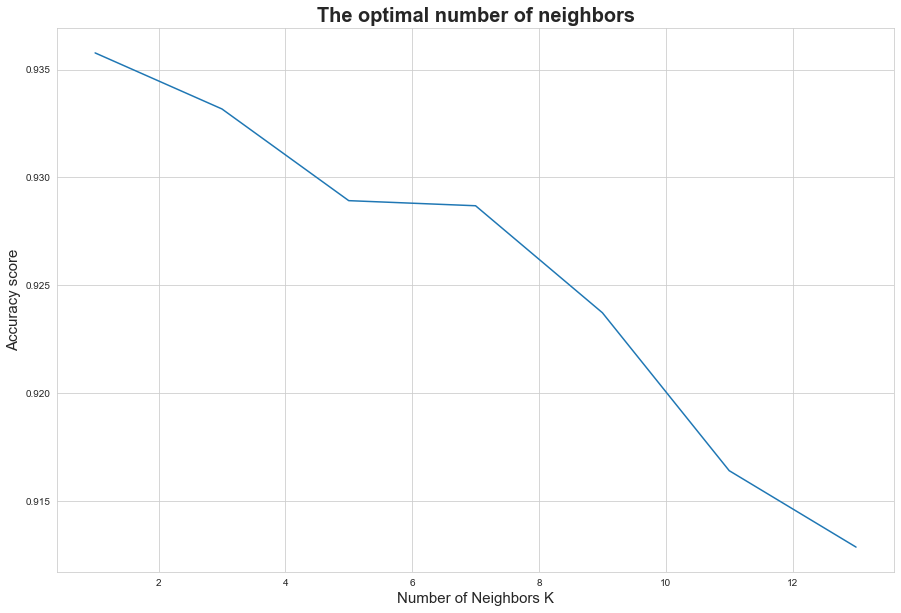

In [280]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)

plt.show()

<a id=section703></a>
## 7.3 Using Logistic Regression

Logistic regression is a supervised learning techinques which helps in classification problems.Logistic Regression is used when the dependent variable(target) is categorical. Sigmoid function or logistic function is used as hypothesis function for logistic regression.

In [282]:
# let us check recall score for logistic regression
y_pred_lr, y_pred_prob_lr = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
                                      , X_train, y_train, X_test, y_test)

In [283]:
print_scores(y_test,y_pred_lr,y_pred_prob_lr)

test-set confusion matrix:
 [[3067  187]
 [ 661  320]]
recall score:  0.32619775739041795
precision score:  0.631163708086785
f1 score:  0.4301075268817205
accuracy score:  0.7997638724911452
ROC AUC: 0.8235729004747235


0.7997638724911452

<a id=section704></a>
## 7.4 Using LDA:

Linear Discriminant Analysis is a __dimensionality reduction__ technique used as a __preprocessing step__ in Machine Learning and __pattern classification applications__.

Linear Discriminant Analysis is a __supervised classification technique__ which takes labels into consideration.

In [284]:
# let us check recall score for logistic regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
y_pred_lda, y_pred_prob_lda = get_predictions(lda, X_train, y_train, X_test, y_test)

In [285]:
print_scores(y_test,y_pred_lda,y_pred_prob_lda)

test-set confusion matrix:
 [[3024  230]
 [ 603  378]]
recall score:  0.3853211009174312
precision score:  0.6217105263157895
f1 score:  0.4757709251101322
accuracy score:  0.8033057851239669
ROC AUC: 0.8296674930627216


0.8033057851239669

In [ ]:
<a id=section704></a>
## 7.4 Create Boosting Classifiers

In [286]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
scores_ada = cross_val_score(reg_ada, X_train, y_train, cv=6)
scores_ada.mean()

0.9288540992705419

In [287]:
score = []
for depth in [1,2,4,6,8,10] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = cross_val_score(reg_ada, X_train, y_train, cv=6)
    score.append(scores_ada.mean())


print(score)

[0.9288540992705419, 0.9625546208320147, 0.9642749818453128, 0.9690312885241474, 0.971460131126884, 0.9734847506776808]


In [ ]:
**Observations** : And the maximal score is reached for a depth of 10 in this simple example, with an accuracy of 97.45%

In [ ]:
<a id="section7"></a>
## 7. Model Comparison

In [ ]:
| Algorithms                                                                                     | Accuracy Score                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:| 
| __Logistic Regression__ | __58.5%__ |
| __Random Forest__ | __64.0%__ |
| __Decision Tree Classifier__| __60.2%__| 
| __Bagging Classifier__ | __64.6%__ |
| __Boosting Classifier__ | __62.8%__ |
| __SVC__| __51.3%__| 
| __Voting Classifier__| __65.1%__| 